In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sts
from sklearn.cluster import KMeans
import seaborn as sns

In [278]:
"""Reading manipulating file with country name
and returning a dataframe and transpose of the dataframe as return"""
def dataFrame(file_name, col, value1):
    # Reading Data for dataframe
    df = pd.read_csv(file_name, skiprows = 4)
    # Grouping data with col value
    df1 = df.groupby(col, group_keys = True)
    #retriving the data with the all the group element
    df1 = df1.get_group(value1)
    #Reseting the index of the dataframe
    df1 = df1.reset_index()
    #Storing the column data in a variable
    a = df1['Country Name']
    # cropping the data from dataframe
    df1 = df1.iloc[253:275,2:]
    df1 = df1.drop(columns=['Indicator Name', 'Indicator Code']) 
    df1.insert(loc=0, column='Country Name', value=a)
    #Dropping the NAN values from dataframe Column wise
    df1= df1.dropna(axis = 0)
    #transposing the index of the dataframe
    df2 = df1.set_index('Country Name').T
    #returning the normal dataframe and transposed dataframe
    return df1, df2

In [279]:
# years using for the data analysis
#years = 35
# countries which are using for data analysis
#countries = [35, 40, 55, 81, 109, 119, 202, 205, 251]
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
GDP_capita_c, GDP_capita_y = dataFrame("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4770417.csv",
                                       "Indicator Name", "GDP per capita (current US$)")
GDP_capita_c

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
253,St. Vincent and the Grenadines,VCT,155.293588,163.424034,166.602193,154.653976,163.883606,165.126044,173.196917,167.777520,...,6754.370184,7117.554763,7210.616623,7386.737595,7684.779208,8030.585057,8399.694011,8674.371009,8335.256476,8666.387041
259,World,WLD,459.260040,471.479375,495.868429,523.441276,561.350115,599.078936,636.710389,663.849905,...,10573.064530,10735.261320,10896.215600,10153.780770,10205.848800,10741.485510,11284.183250,11319.754110,10881.703700,12234.796800
263,South Africa,ZAF,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,...,8173.869138,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776
264,Zambia,ZMB,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,...,1729.647471,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633
265,Zimbabwe,ZWE,276.643363,279.332656,275.966139,277.532515,282.376856,294.893605,279.337779,295.056449,...,1290.193956,1408.367810,1407.034293,1410.329174,1421.787789,1192.107012,2269.177012,1421.868596,1372.696674,1773.920411


In [280]:
GDP_capita_y=GDP_capita_y.drop('Country Code',axis=0)
GDP_capita_y

Country Name,St. Vincent and the Grenadines,World,South Africa,Zambia,Zimbabwe
1960,155.293588,459.26004,529.561923,228.567398,276.643363
1961,163.424034,471.479375,543.042224,216.274674,279.332656
1962,166.602193,495.868429,560.699395,208.562685,275.966139
1963,154.653976,523.441276,601.599951,209.453362,277.532515
1964,163.883606,561.350115,642.688431,236.941713,282.376856
...,...,...,...,...,...
2017,8030.585057,10741.48551,6734.475153,1495.752138,1192.107012
2018,8399.694011,11284.18325,7048.522211,1475.204538,2269.177012
2019,8674.371009,11319.75411,6688.787271,1268.120941,1421.868596
2020,8335.256476,10881.7037,5741.643129,956.831364,1372.696674


In [281]:
wcss = []
x=GDP_capita_y.values
for i in range(1, 60):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 20, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1698723591.2649822,
 371628477.0275293,
 143011731.32832354,
 96891729.08488198,
 61502469.69836697,
 48678699.39283416,
 39747906.09055206,
 32449278.133893475,
 26660432.798526794,
 21219537.747041393,
 18242671.63885776,
 15472053.880947247,
 13501195.579930361,
 11889130.828751542,
 10847304.82013825,
 9580754.152013661,
 8521517.564765126,
 7716185.16983531,
 7090915.162273867,
 6125126.07545459,
 5604533.366883545,
 4872663.587179095,
 4205532.122424168,
 3701682.753262547,
 3269310.0433192775,
 2757202.6327544325,
 2393394.5170332873,
 2223369.709378095,
 1927778.916496452,
 1740797.7772274814,
 1574695.1803798103,
 1422690.362642683,
 1249960.4714112,
 1154070.1363132456,
 1022651.4584853282,
 897405.8408337528,
 754097.2931213024,
 660810.3717084131,
 554993.1689324002,
 483279.5928385642,
 429741.7288347151,
 376858.03917359235,
 319308.9453965095,
 256505.05286879392,
 208492.4547695802,
 179508.44958191566,
 154536.8950193028,
 129873.60245379305,
 106844.80705276306,
 844

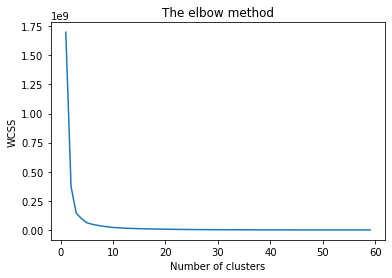

In [282]:
plt.plot(range(1, 60), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [283]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [284]:
kmeans.cluster_centers_

array([[ 3005.91518233,  5020.94122811,  3406.57449439,   425.46955735,
          660.03812267],
       [ 7173.68507065, 10064.39192365,  6822.13556282,  1339.02283809,
         1143.49384102],
       [  485.46784104,  1433.01541822,  1488.96925156,   425.50196136,
          559.36282124]])

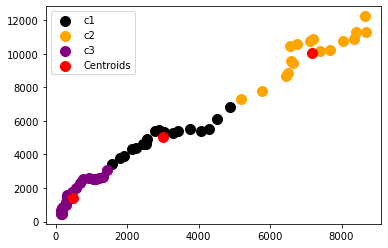

In [285]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'black', label = 'c1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'c2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'purple', label = 'c3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()